In [284]:
import itertools
import warnings

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [285]:
data = sm.datasets.sunspots.load_pandas()
dataframe = data.data
dataframe["YEAR"] = pd.to_datetime(dataframe["YEAR"], format="%Y")
dataframe

,YEAR,SUNACTIVITY
0,1700-01-01,5.0
1,1701-01-01,11.0
2,1702-01-01,16.0
3,1703-01-01,23.0
4,1704-01-01,36.0
...,...,...
304,2004-01-01,40.4
305,2005-01-01,29.8
306,2006-01-01,15.2
307,2007-01-01,7.5


In [286]:
dataframe.describe()

,SUNACTIVITY
count,309.000000
mean,49.752104
std,40.452595
min,0.000000
25%,16.000000
50%,40.000000
75%,69.800000
max,190.200000


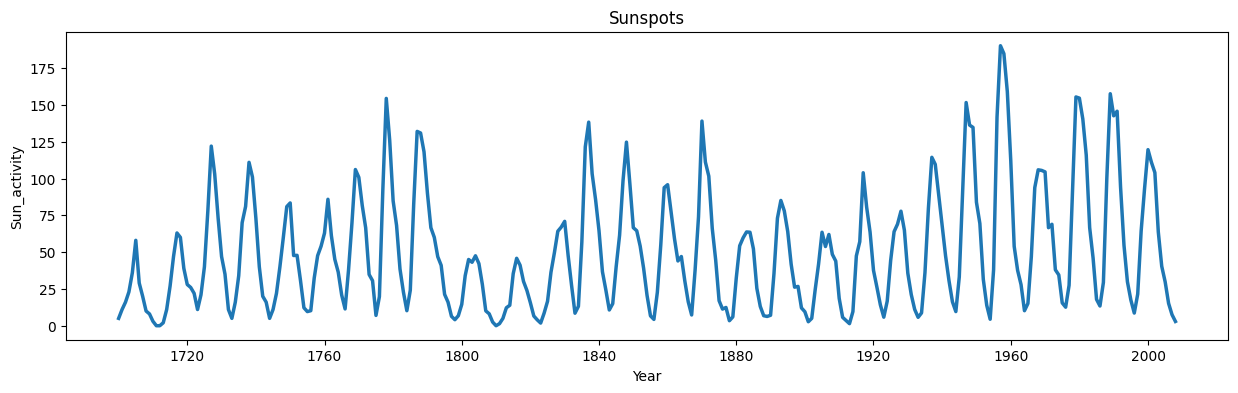

In [287]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(dataframe["YEAR"], dataframe["SUNACTIVITY"], linewidth=2.5)
plt.xlabel("Year")
plt.ylabel("Sun_activity")
plt.title("Sunspots")
plt.show()

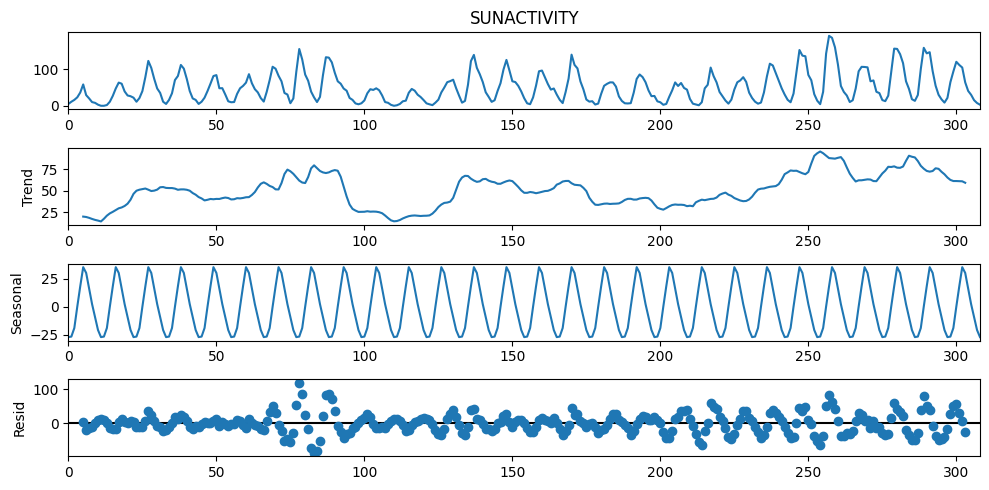

In [288]:
decompose = seasonal_decompose(dataframe["SUNACTIVITY"],model="additive", period=11)
decompose.plot()
plt.show()

In [289]:
result = adfuller(dataframe["SUNACTIVITY"], autolag="AIC")
print(f"ADF-statisctics: {result[0]}")
print(f"p-value: {result[1]}")
for key, value in result[4].items():
    print("Critical values:")
    print(f'   {key}, {value}')

ADF-statisctics: -2.8377807249381966
p-value: 0.05307642172812041
Critical values:
   1%, -3.4523371197407404
Critical values:
   5%, -2.871222860740741
Critical values:
   10%, -2.571929211111111


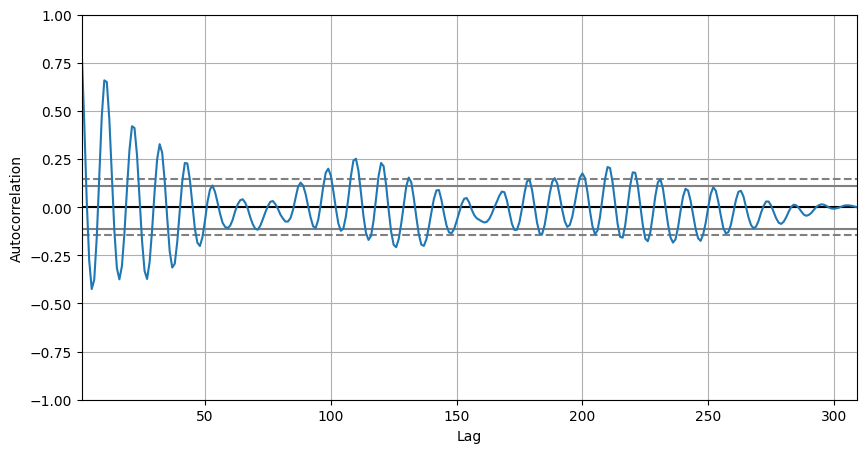

In [290]:
plt.rcParams.update({"figure.figsize":(10,5), "figure.dpi":100})
autocorrelation_plot(dataframe["SUNACTIVITY"])
plt.show()

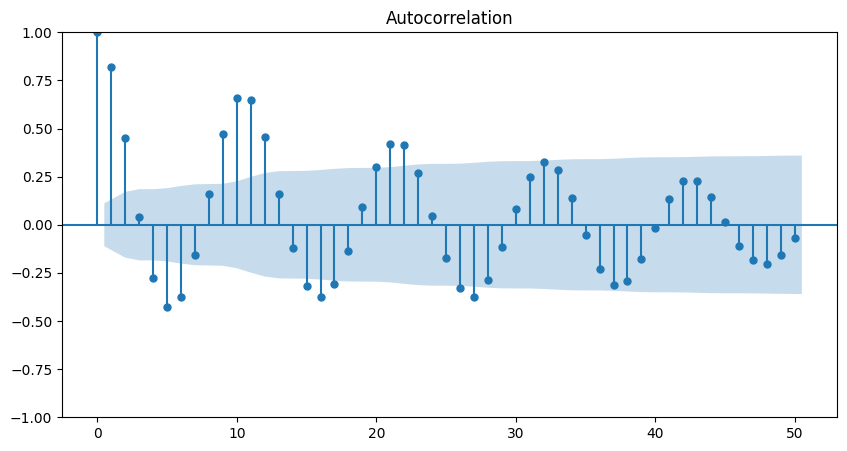

In [291]:
plt.rcParams.update({"figure.figsize":(10,5), "figure.dpi":100})
plot_acf(dataframe["SUNACTIVITY"], lags=50)
plt.show()

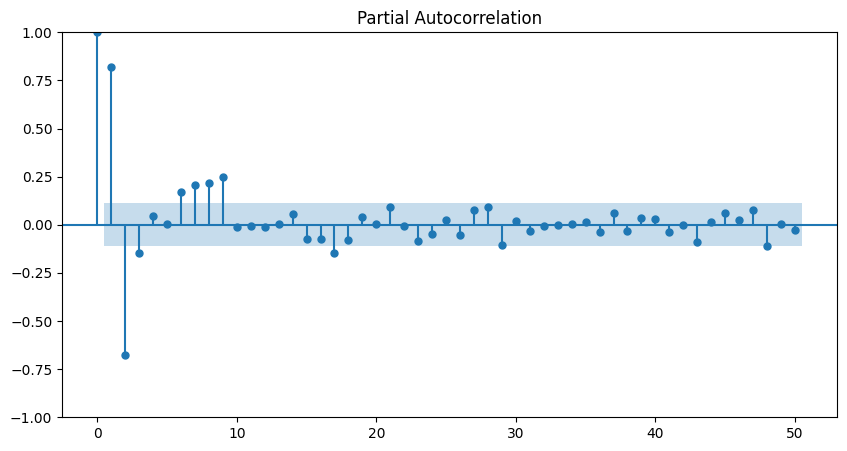

In [292]:
plt.rcParams.update({"figure.figsize":(10,5), "figure.dpi":100})
plot_pacf(dataframe["SUNACTIVITY"], lags=50, method="ywm")
plt.show()

In [293]:
X = dataframe
X.index = X["YEAR"]
X = X.drop("YEAR", axis=1)
X

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


In [294]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))] 

In [295]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.arima.ARIMA(X, order=param)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 1)x(0, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 0, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 1, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 1, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 1, 0)x(0, 0, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 0, 1) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 1) - AIC:2833.115798326172
ARIM

ARIMA(1, 0, 1)x(0, 0, 0) - AIC:2713.226344492052

In [296]:
mod = sm.tsa.arima.ARIMA(X, order=(1, 0, 1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712


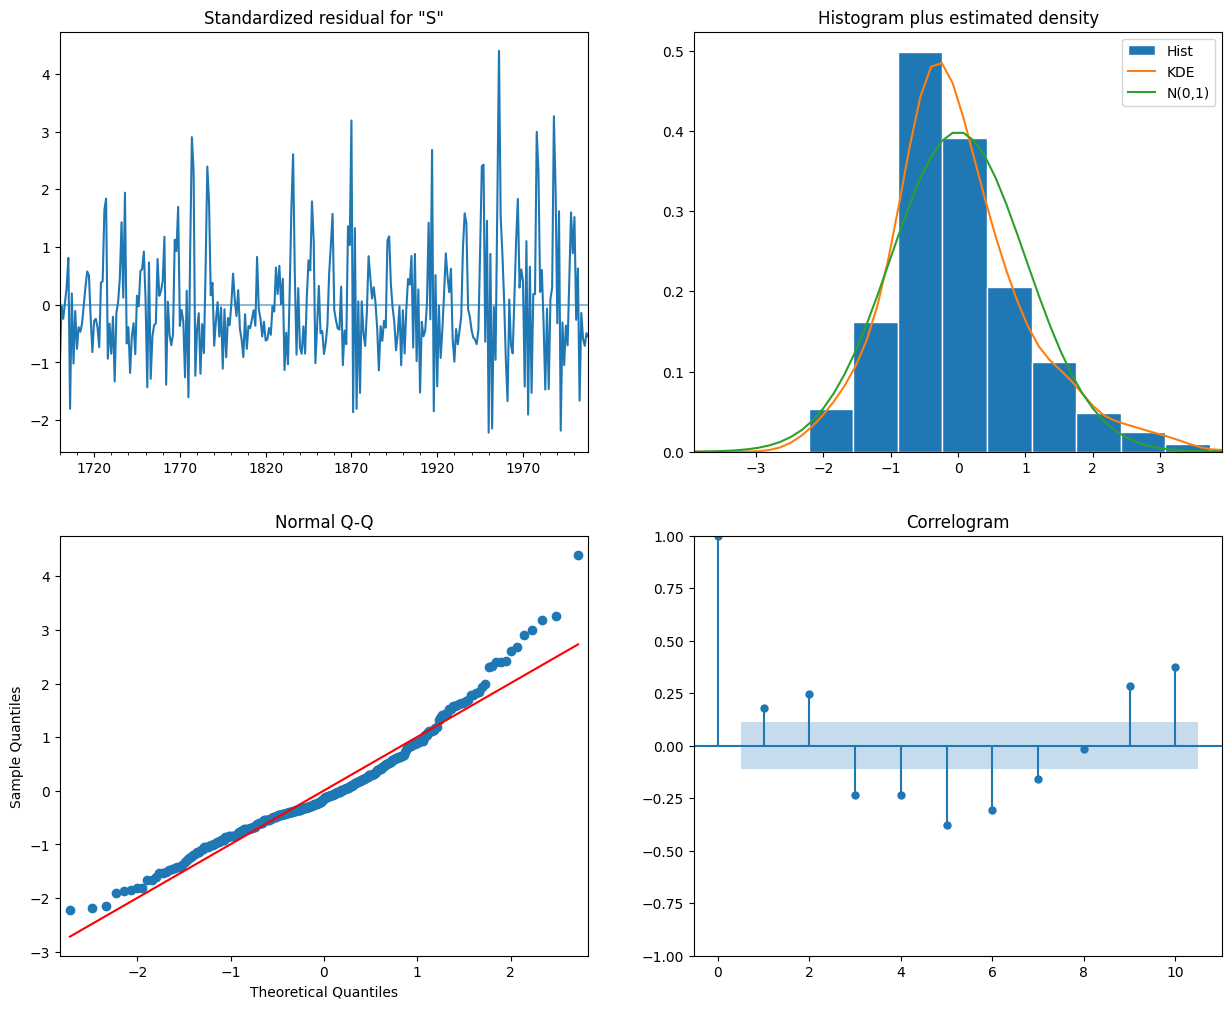

In [297]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [298]:
pred = results.get_prediction(start=pd.to_datetime("1995"), dynamic=False)
pred_ci = pred.conf_int()

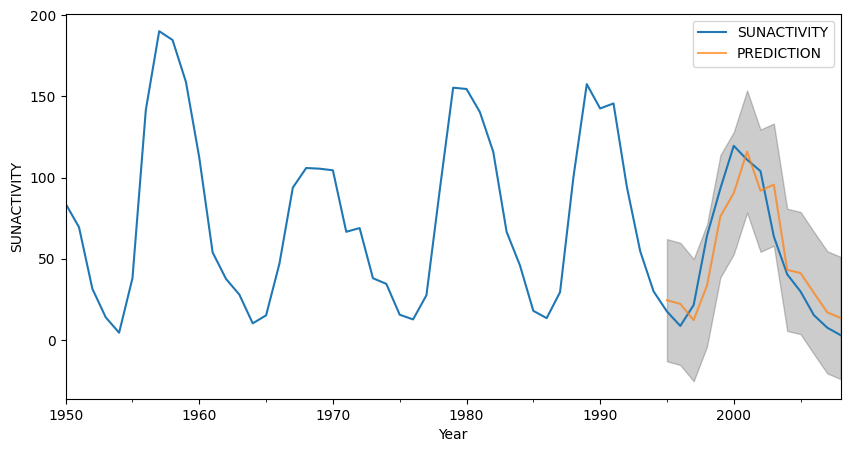

In [299]:
ax = X["1950":].plot(label="SUNACTIVITY")
pred.predicted_mean.plot(ax=ax, label="PREDICTION", alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel("Year")
ax.set_ylabel("SUNACTIVITY")
plt.legend()
plt.show()

In [300]:
y_forecasted = pred.predicted_mean
y_truth = X["1995":]["SUNACTIVITY"]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("mean squared error of forecasts = {}".format(round(mse, 2)))

mean squared error of forecasts = 294.9


In [301]:
pred_dynamic = results.get_prediction(start=pd.to_datetime("1995-01-01"), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

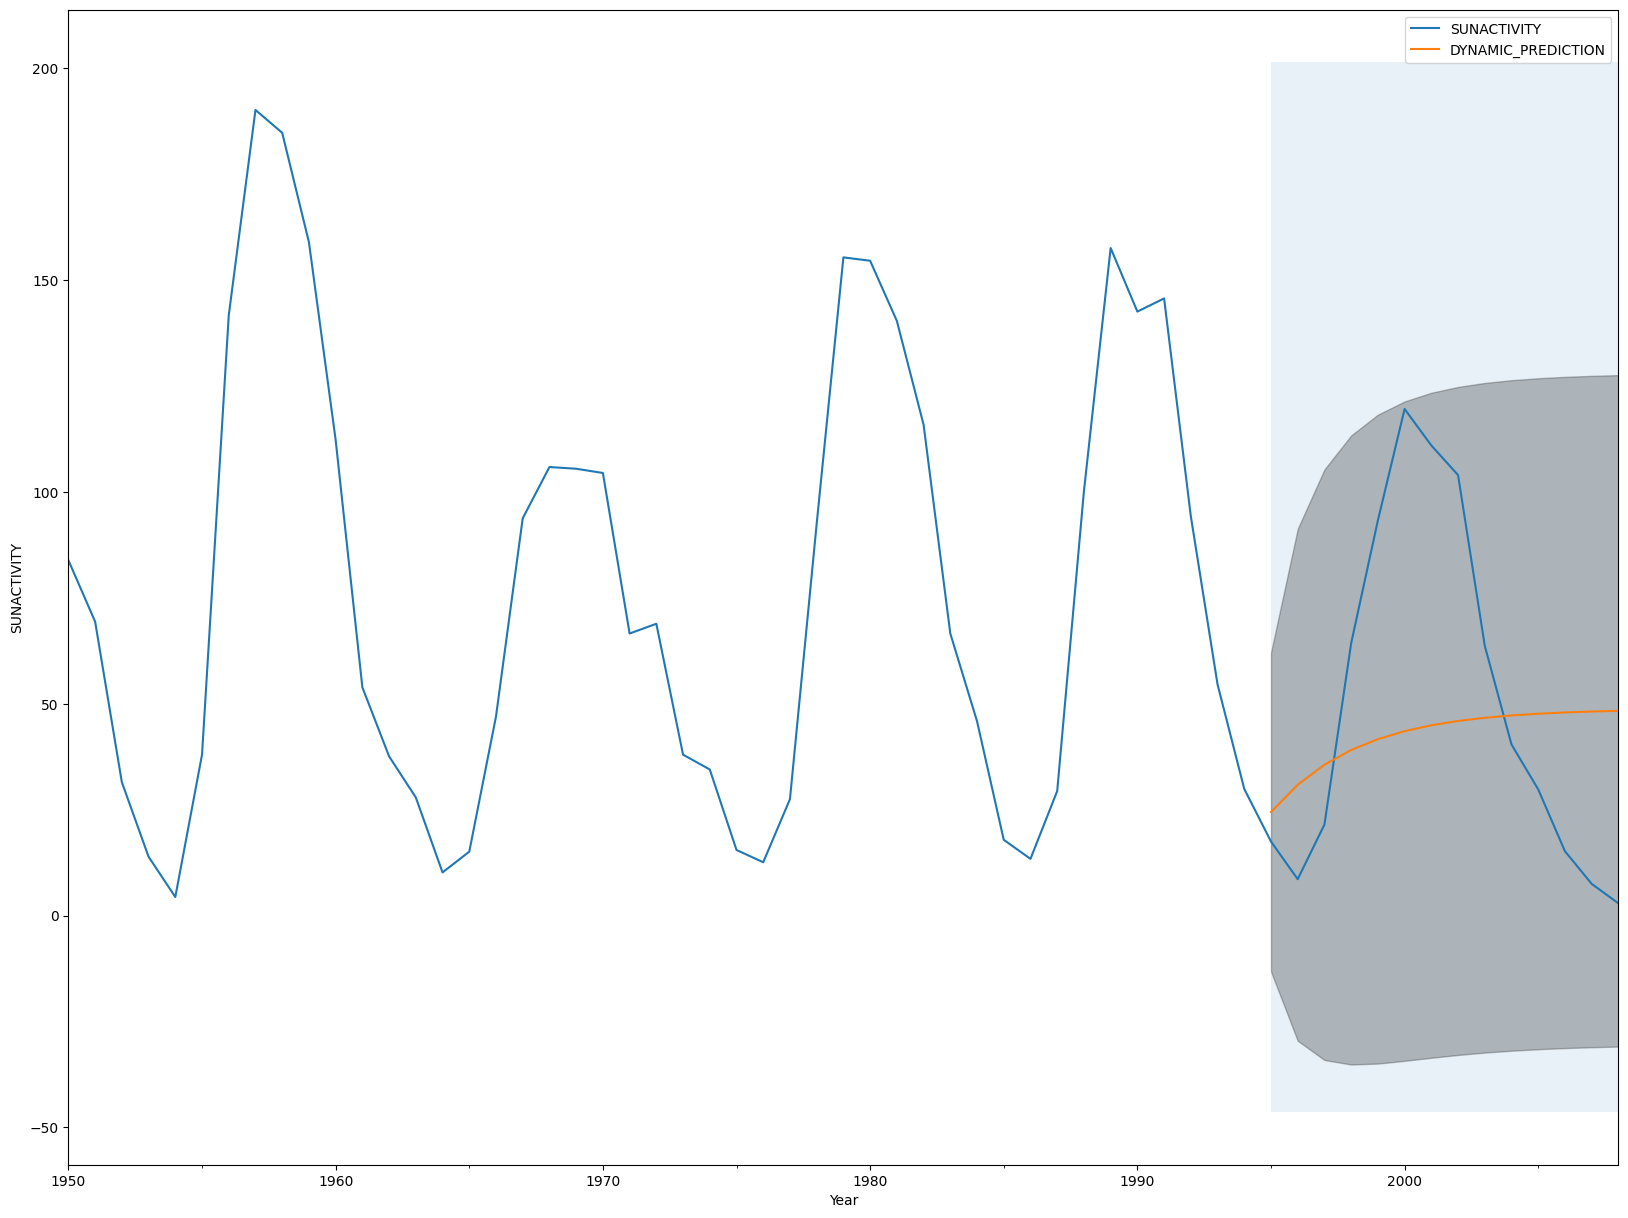

In [302]:
ax = X["1950":].plot(label="SUNACTIVITY", figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label="DYNAMIC_PREDICTION", ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime("1995-01-01"), X.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel("Year")
ax.set_ylabel("SUNACTIVITY")
plt.legend()
plt.show()

In [303]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

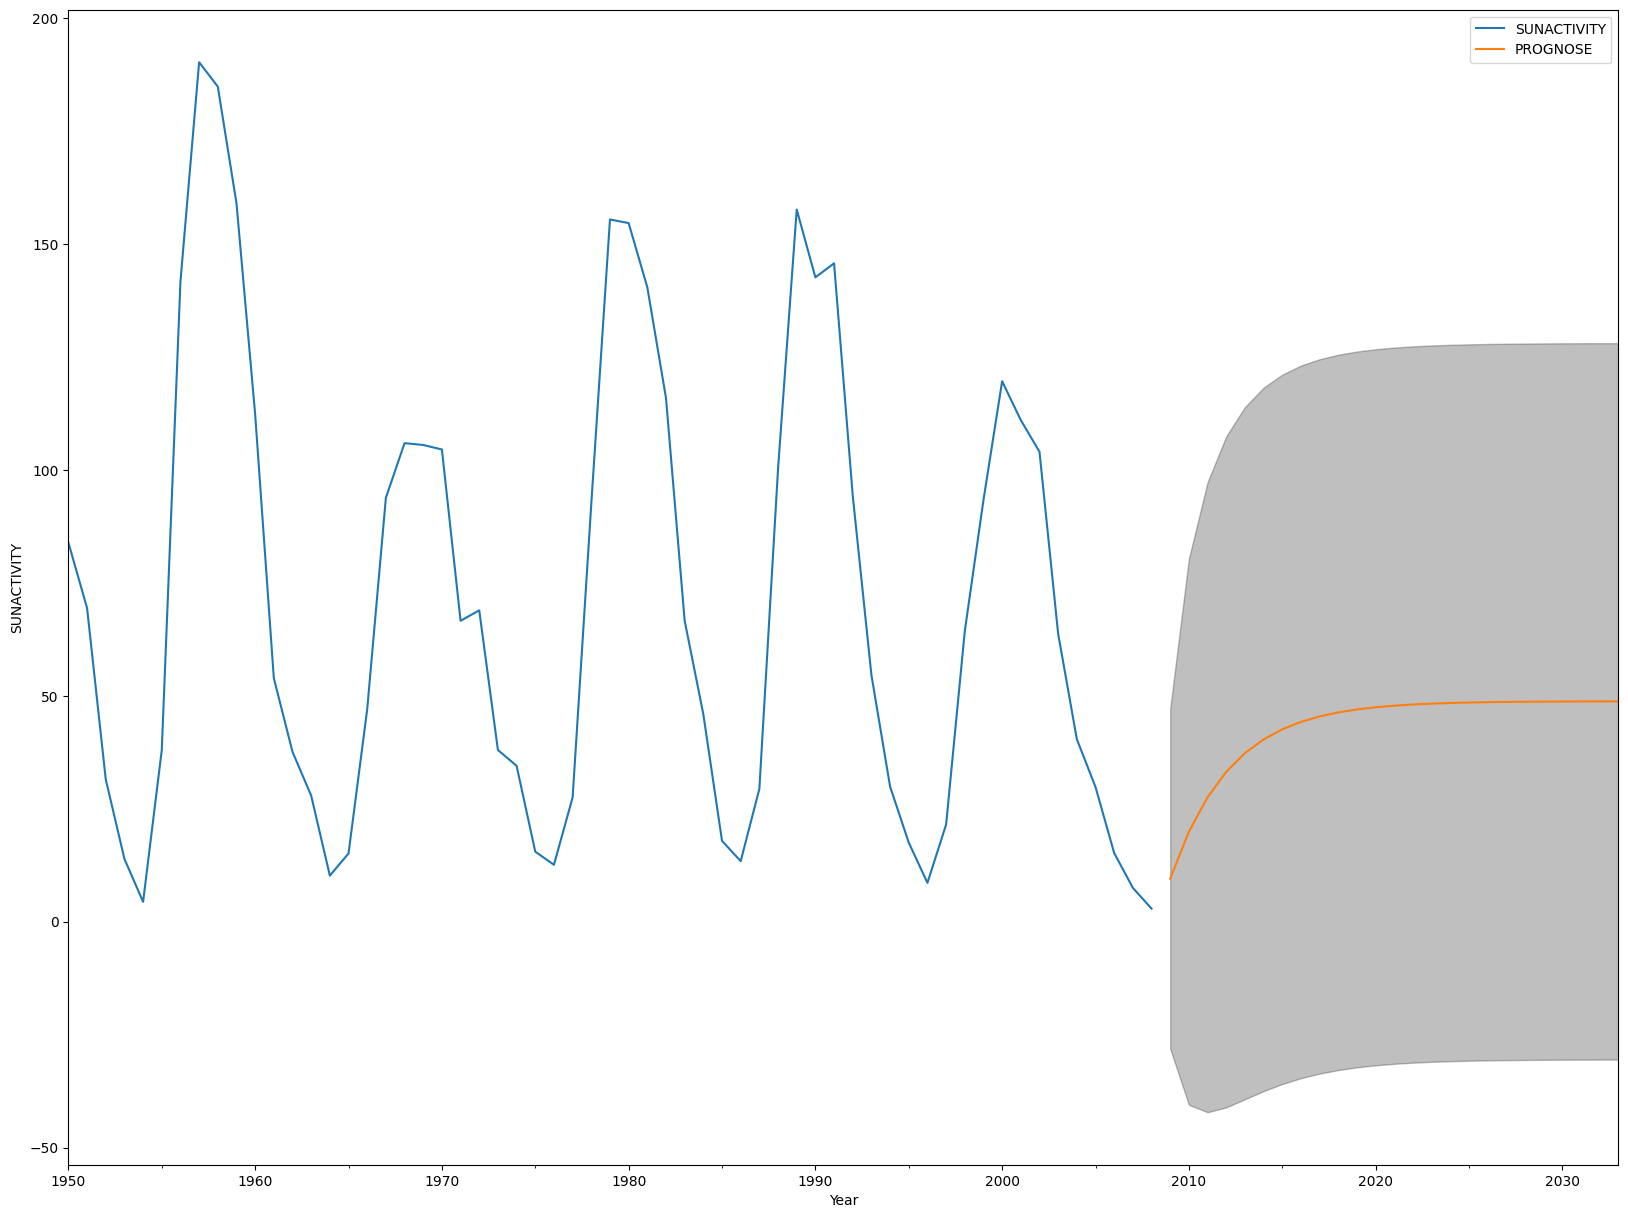

In [304]:
ax = X["1950":].plot(label="SUNACTIVITY", figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label="PROGNOSE")
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel("Year")
ax.set_ylabel("SUNACTIVITY")
plt.legend()
plt.show()

**ARIMA model did quite inaccurate prediction and completely irrelevant dynamic prediction. The prognose itself is just awful. There is no trend or season for the data on yearly sunspot activity.**